In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/automobile-customer.csv')

In [3]:
data.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [4]:
from utils import preprocess_data

data_ = data.drop(['CustomerID'], axis = 1 ) #WorkExperience, , 'Category'
isscale = False #Model trong thư viện sklearn đã scale rồi

df, cache= preprocess_data(data_)
df[:5]
X = df.drop(['Segmentation',],axis = 1).values
y = df['Segmentation'].values
if isscale:
    Xs = preprocessing.scale(X)
else:
    Xs = X


O: Gender
O: Married
O: Graduated
O: Profession
O: SpendingScore
O: Category


In [5]:
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.losses import BinaryCrossentropy

def Vanilla_AE(H=5):
    model = Sequential()
    model.add(InputLayer(input_shape=(28,)))
    # model.add(Dense(24, activation='relu', use_bias=False))
    model.add(Dense(H, activation='relu', use_bias=False, name='code_layer'))
    # model.add(Dense(24, activation='relu', use_bias=False))
    model.add(Dense(28, activation='tanh', use_bias=False))
    model.compile(optimizer='adam', loss='mse')
    return model

In [6]:
ae = Vanilla_AE(H=20)
ae.fit(Xs, Xs, shuffle=True, epochs=5, batch_size=20, verbose=1)

Epoch 1/5
349/349 [==============================] - 1s 2ms/step - loss: 76.1077
Epoch 2/5
349/349 [==============================] - 1s 2ms/step - loss: 75.0142
Epoch 3/5
349/349 [==============================] - 0s 1ms/step - loss: 74.9842
Epoch 4/5
349/349 [==============================] - 0s 1ms/step - loss: 74.9667
Epoch 5/5
349/349 [==============================] - 0s 1ms/step - loss: 74.9519


In [7]:
inputs = ae.input
outputs = ae.get_layer(name="code_layer").output
encoder = Model(inputs=inputs, outputs=outputs)

In [8]:
X = encoder.predict(Xs)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print('x train:', X_train.shape)
print('x test:', X_test.shape)

x train: (5575, 20)
x test: (1394, 20)


In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[08:59:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1 3 3 ... 0 1 2]
[0 3 3 ... 1 3 0]
Accuracy: 45.77%


Accuracy: 46.20%


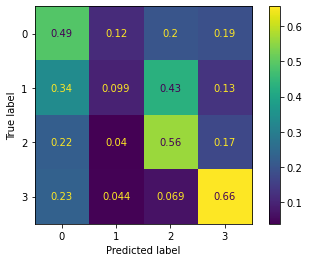

In [11]:
clf = svm.SVC()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')
clf.fit(X_test,y_test)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.14%


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9, weights="distance")
clf.fit(X_test, y_test)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.92%


In [15]:
df.shape

(6969, 29)

In [16]:
data.shape

(8068, 11)